In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [2]:
df = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/car data.csv')

In [3]:
df.head(6)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# unique cars
df.Car_Name.unique().size

98

In [8]:
# unique categories in seller_type column
df.Seller_Type.unique()

array(['Dealer', 'Individual'], dtype=object)

In [9]:
# unique categories in Owner column 
df.Owner.unique()

array([0, 1, 3])

In [10]:
num_features = ['Year' , 'Selling_Price' , 'Present_Price' , 'Kms_Driven' ]
cat_features = ['Car_Name', 'Fuel_Type' ,'Seller_Type' , 'Transmission' ]

In [11]:
# Average Selling price
print(f'Selling Price Mean : {df.Selling_Price.mean():.2f}' )
print(f'Selling Price Median : {df.Selling_Price.median():.2f}' )

Selling Price Mean : 4.66
Selling Price Median : 3.60


In [12]:
# Average Present Price
print(f'Present Price Mean : {df.Present_Price.mean():.2f}' )
print(f'Present Price Median : {df.Present_Price.median():.2f}' )

Present Price Mean : 7.63
Present Price Median : 6.40


In [13]:
# Average Present Price
print(f'Kms Driven Mean : {df.Kms_Driven.mean():.2f}' )
print(f'Kms Driven Price Median : {df.Kms_Driven.median():.2f}' )

Kms Driven Mean : 36947.21
Kms Driven Price Median : 32000.00


In [14]:
df1 = df.groupby('Car_Name').agg({'Car_Name':'count'})
df1.index.name = ''
df1 = df1.sort_values('Car_Name' , ascending=False)[:10]

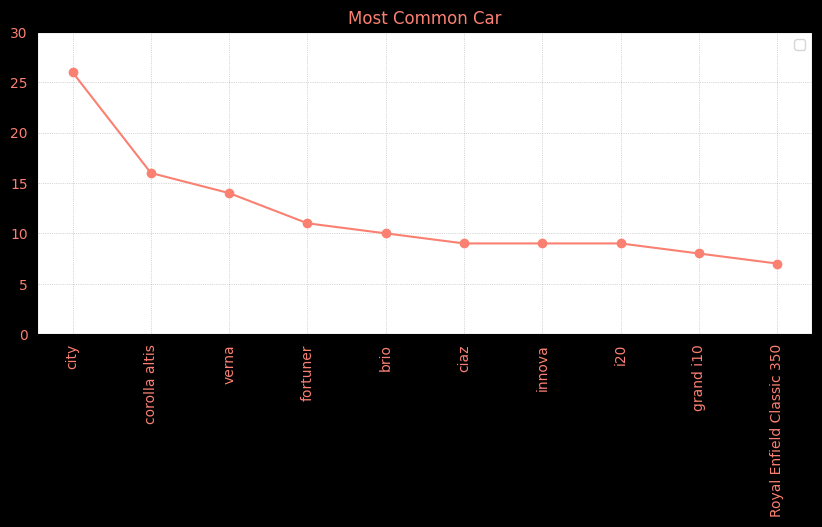

In [15]:
plt.figure(dpi=100 ,figsize=(10 ,4) , facecolor='black' ,edgecolor='lightgreen')
plt.title('Most Common Car' ,color='salmon')
plt.plot(df1.index , df1.values.flatten() ,color='salmon' , marker='o' ,)
plt.xticks(color='salmon' ,rotation=90)
plt.yticks( np.arange(0 ,31 , 5) ,color='salmon')
plt.grid(ls=':' , lw='.5' , color='k' ,alpha=.3)
plt.legend()
plt.show()


### Lets See Skewness of Numerical Data

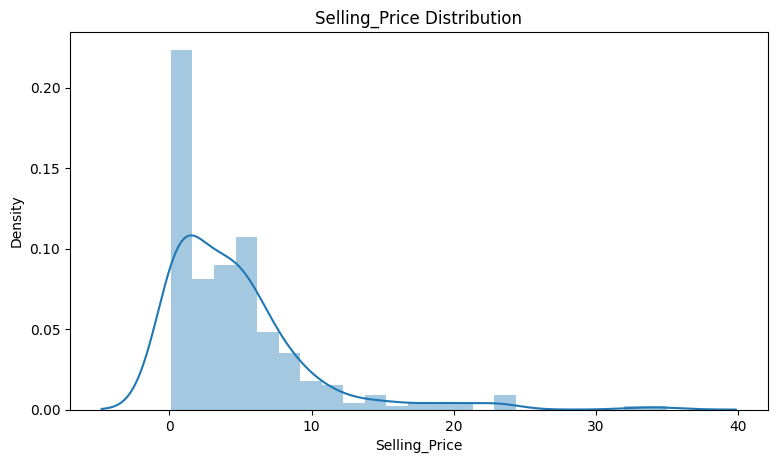

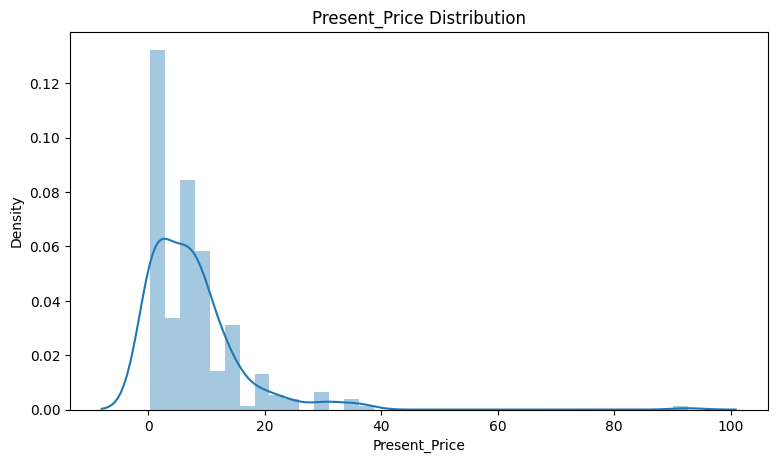

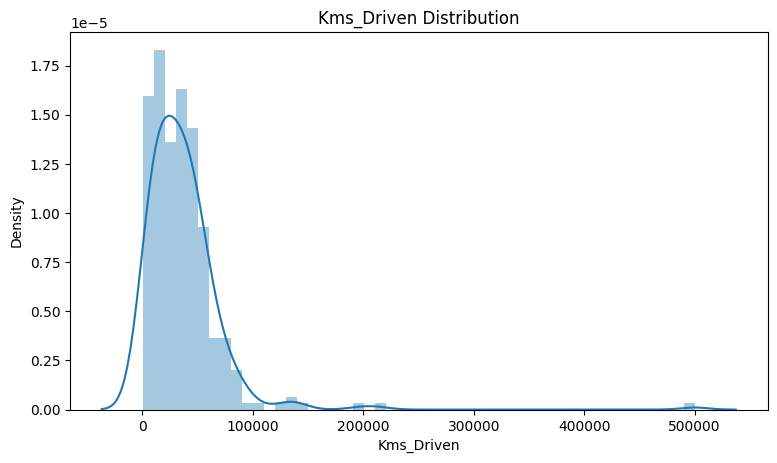

In [16]:
ls = ['Selling_Price' , 'Present_Price' , 'Kms_Driven']
for i in ls:
    plt.figure(dpi=100 ,figsize=(9 ,5))
    plt.title(f'{i} Distribution')
    sns.distplot(x=df[i])
    plt.xlabel(i)
    plt.show()

**Average Selling and Present Price of Top 5 Brands**

In [17]:
df1 = df.groupby('Car_Name').agg({'Selling_Price':'mean' , 'Present_Price':'mean'})
df1 = df1.sort_values('Selling_Price')

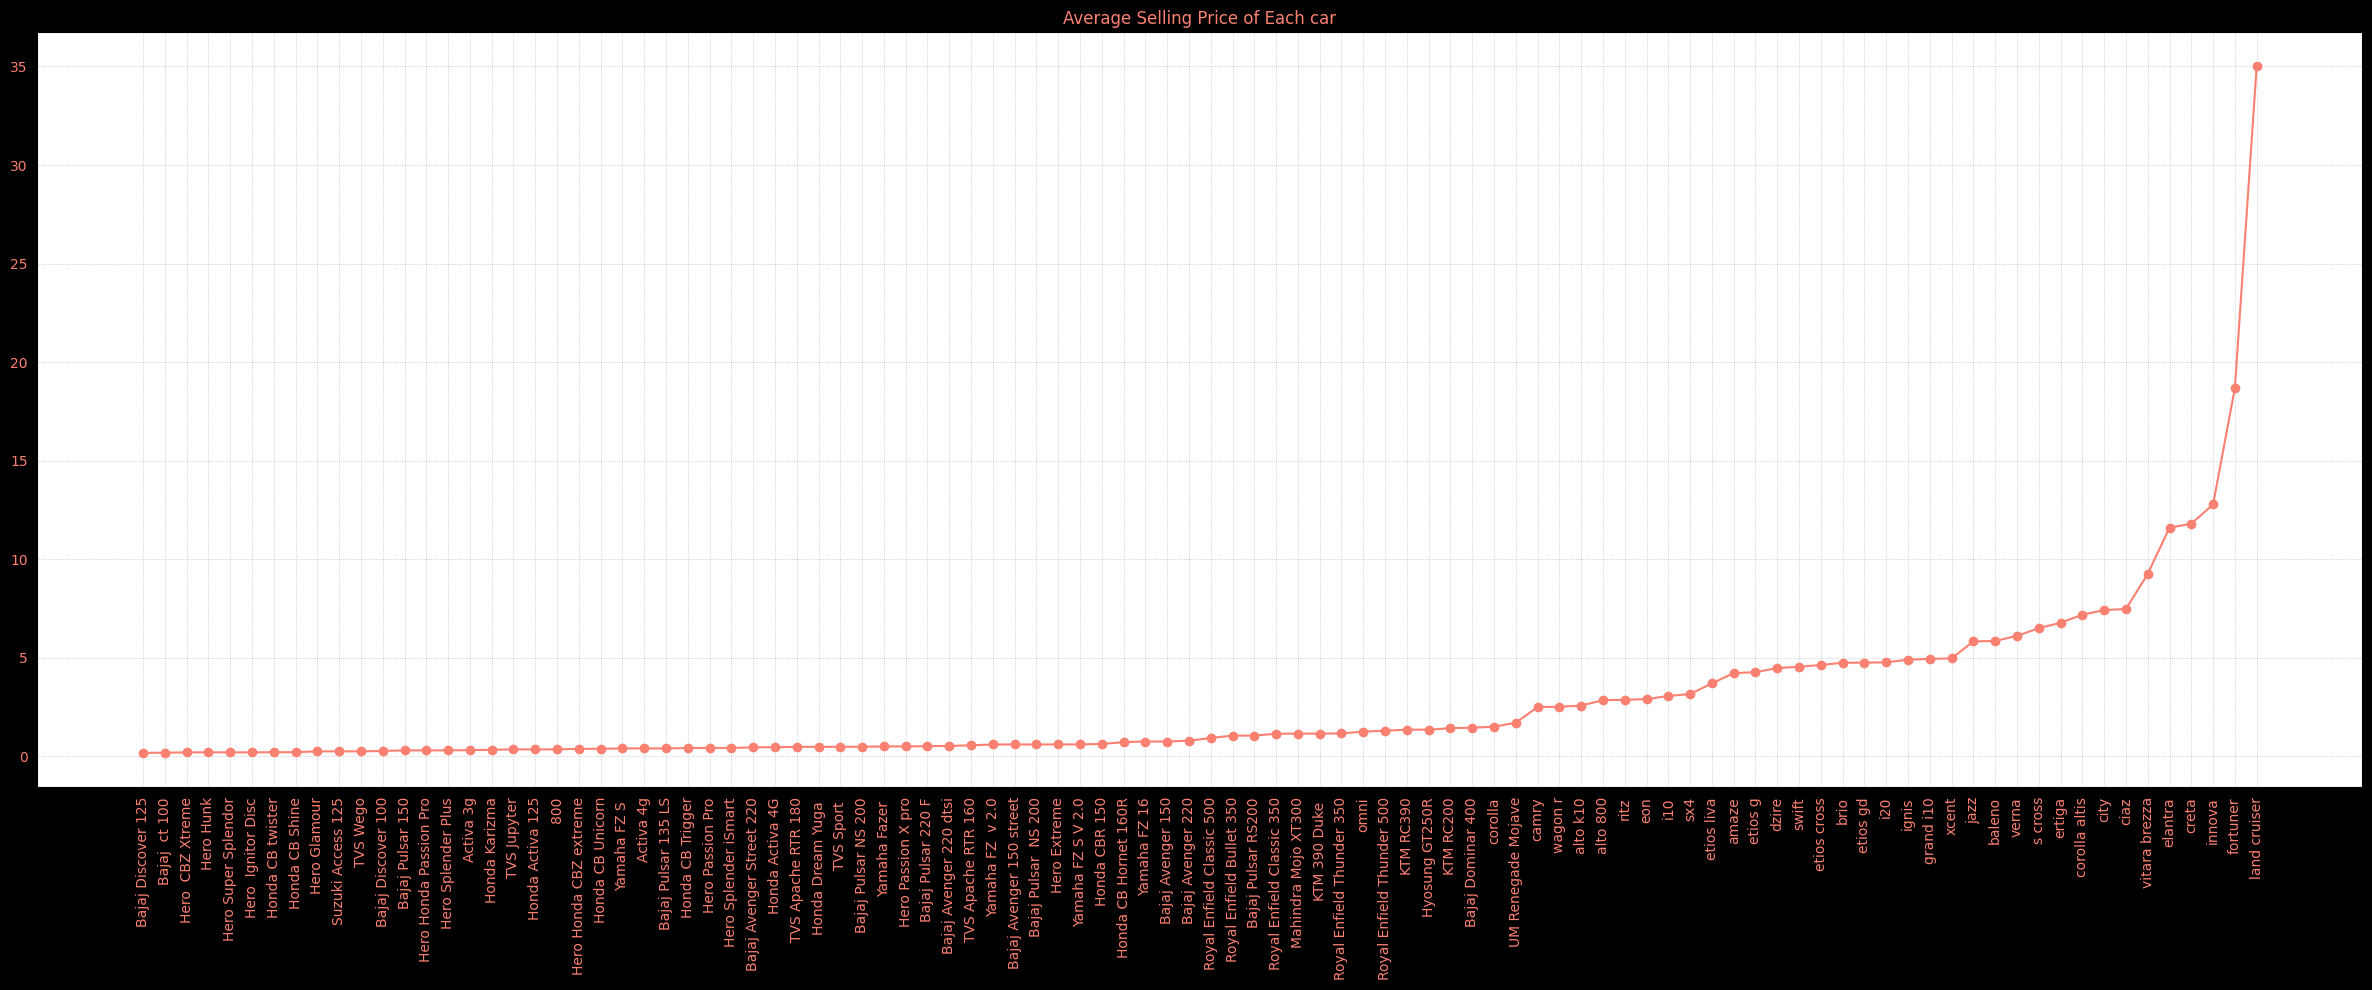

In [18]:
plt.figure(dpi=100 ,figsize=(30 ,10) , facecolor='black' ,edgecolor='lightgreen')
plt.title('Average Selling Price of Each car',color='salmon')
plt.plot(df1.index , df1['Selling_Price'] ,color='salmon' , marker='o' ,)
plt.xticks(color='salmon' ,rotation=90)
plt.yticks(color='salmon')
plt.grid(ls=':' , lw='.5' , color='k' ,alpha=.3)
plt.show()


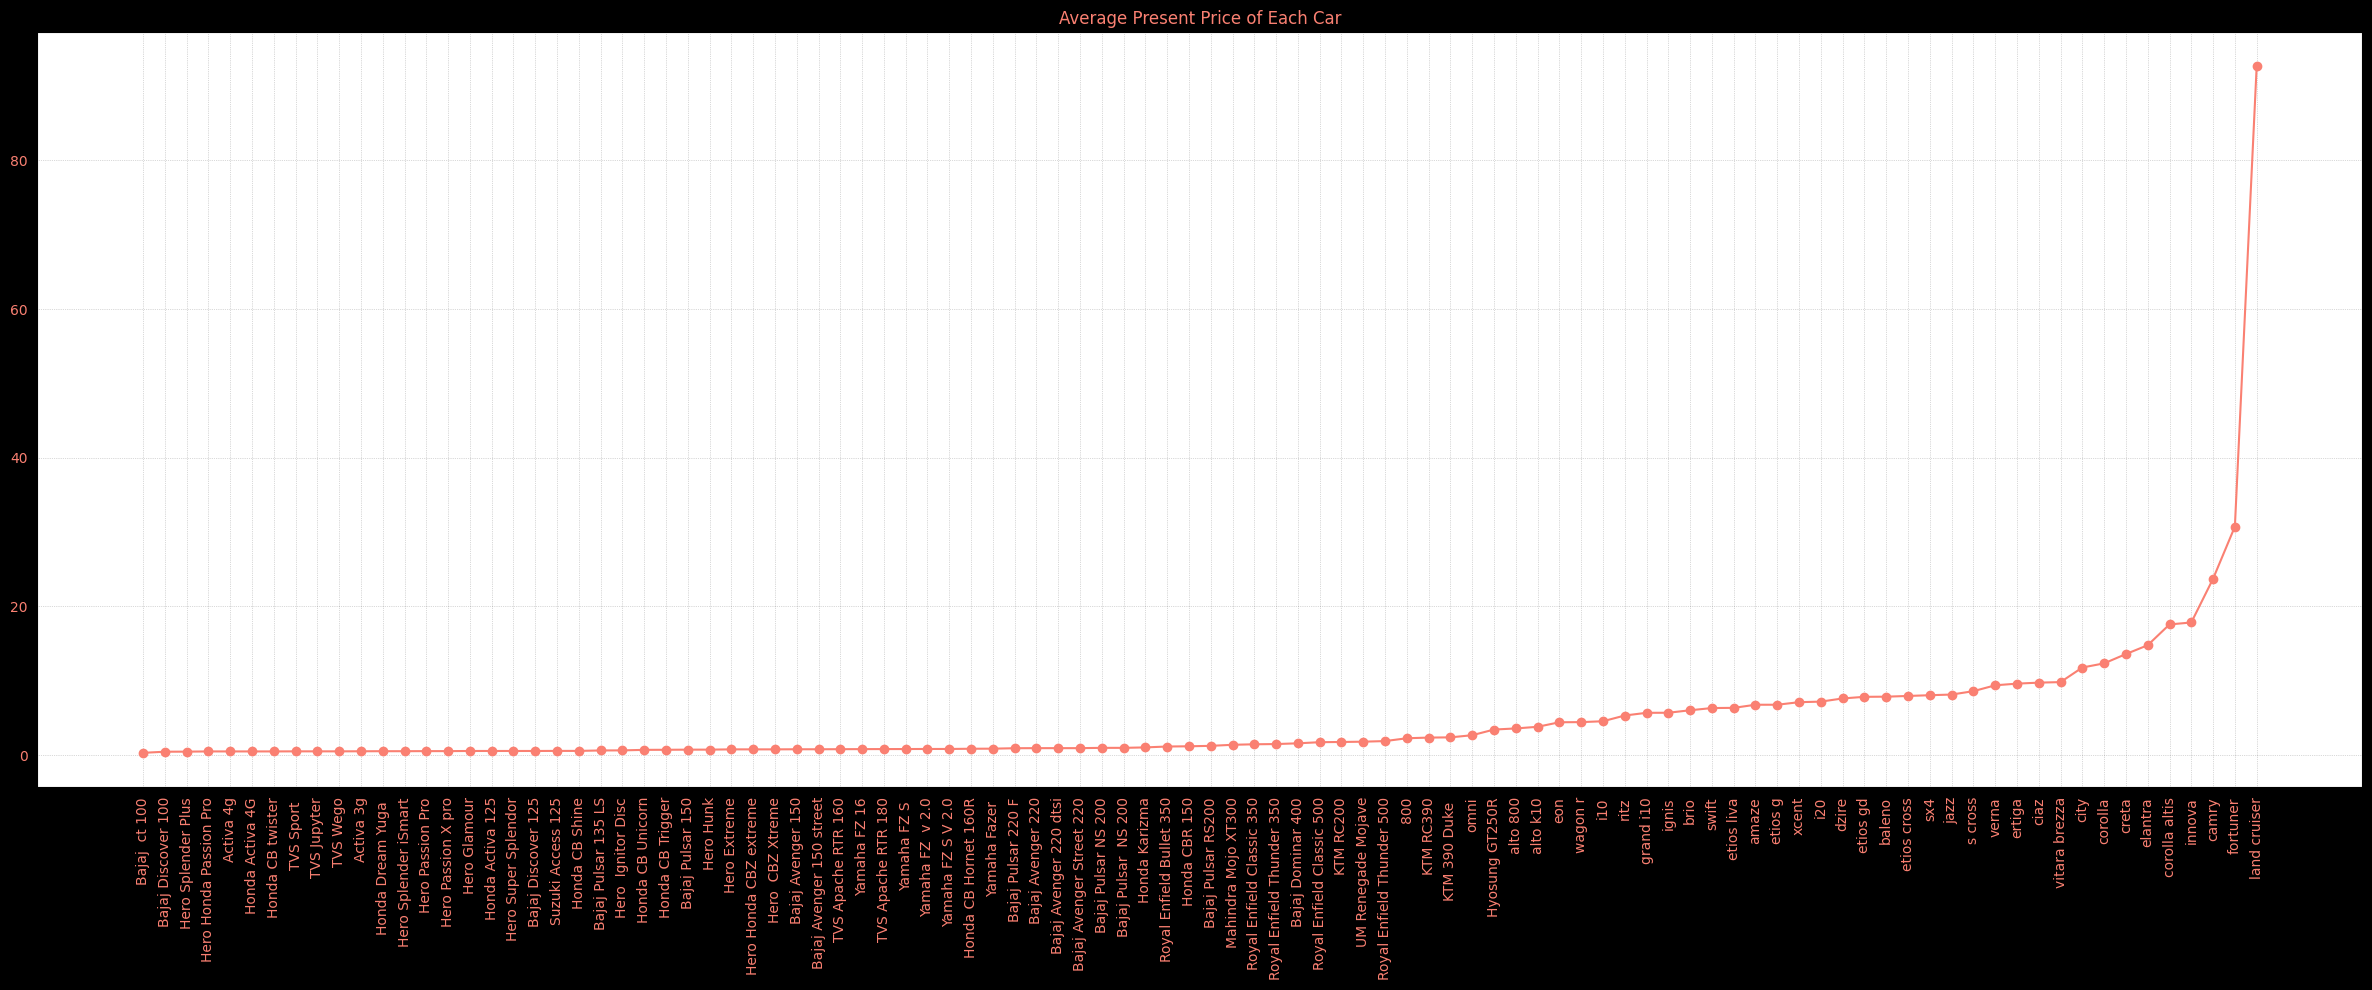

In [19]:
df1 = df1.sort_values('Present_Price')

plt.figure(dpi=100 ,figsize=(30 ,10) , facecolor='black' ,edgecolor='lightgreen')
plt.title('Average Present Price of Each Car',color='salmon')
plt.plot(df1.index , df1['Present_Price'] ,color='salmon' , marker='o' ,)
plt.xticks(color='salmon' ,rotation=90)
plt.yticks(color='salmon')
plt.grid(ls=':' , lw='.5' , color='k' ,alpha=.3)
plt.show()


### `Selling` , `Present` Price Per `Year` 

In [20]:
df1 = df.groupby('Year').agg({'Selling_Price':'mean','Present_Price':'mean'})
df1

,Selling_Price,Present_Price
Year,,
2003,1.300000,5.130000
2004,1.500000,12.350000
2005,2.487500,9.485000
2006,1.437500,9.057500
2007,0.160000,0.665000
2008,1.002857,4.759571
2009,2.816667,10.601667
2010,5.262667,14.330667
2011,2.375263,5.148053


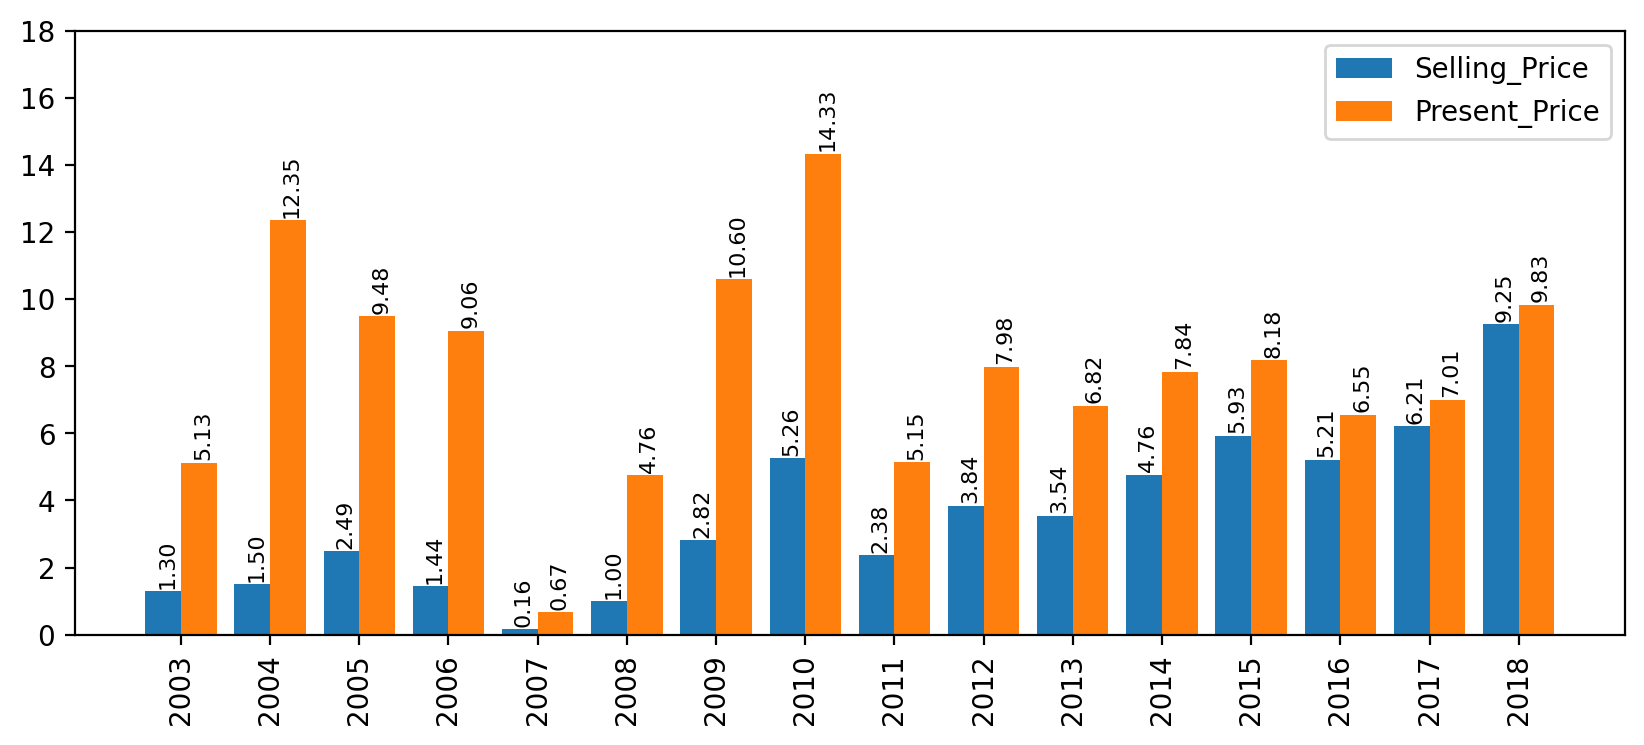

In [21]:
x = np.arange(0 ,16)-.2
plt.figure(dpi=200 ,figsize=(10 ,4))
for i in ['Selling_Price','Present_Price']:
    bars = plt.bar(x,df1[i] ,width=.4 , align='center' ,label=i)
    for bar in bars:
        plt.text(bar.get_x()+bar.get_width()/3 , bar.get_height()+.2 , s=f'{bar.get_height():.2f}' ,fontdict={'size':8}  ,rotation=90)
    x = x+.4
plt.xticks(np.arange(0 ,16) ,df1.index , rotation=90)
plt.yticks(np.arange(0 ,20 ,2))
plt.legend()
plt.show()



#### lets check does selling price depends on selling price


In [22]:
df1 = df.groupby('Seller_Type').agg({'Selling_Price':'mean','Present_Price':'mean'})
df1['Percentage_Price_Drop'] = df1['Selling_Price']*100 / df1['Present_Price']
df1
# here the 

,Selling_Price,Present_Price,Percentage_Price_Drop
Seller_Type,,,
Dealer,6.721692,10.886308,61.744464
Individual,0.870943,1.635283,53.259490


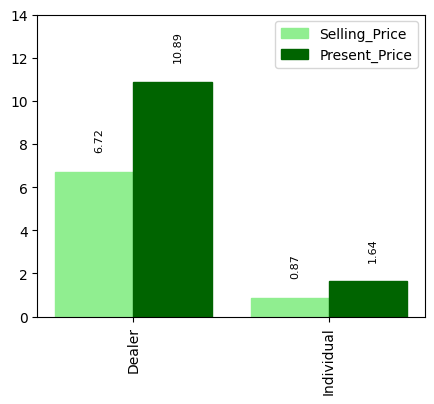

In [23]:
x = np.arange(0 ,2)-.2 ; w = .4
plt.figure(dpi=100 ,figsize=(5 ,4))
for i ,color in zip(['Selling_Price','Present_Price'] , ['lightgreen','darkgreen']):
    bars = plt.bar(x,df1[i] ,width=w , align='center' ,label=i)
    for bar in bars:
        bar.set_color(color)
        plt.text(bar.get_x()+bar.get_width()/2 , bar.get_height()+1 , s=f'{bar.get_height():.2f}' ,fontdict={'size':8}  ,rotation=90)
    x = x+w
plt.xticks( np.arange(2) ,df1.index ,rotation=90)
plt.yticks(np.arange(0 ,16 ,2))
plt.legend()
plt.show()


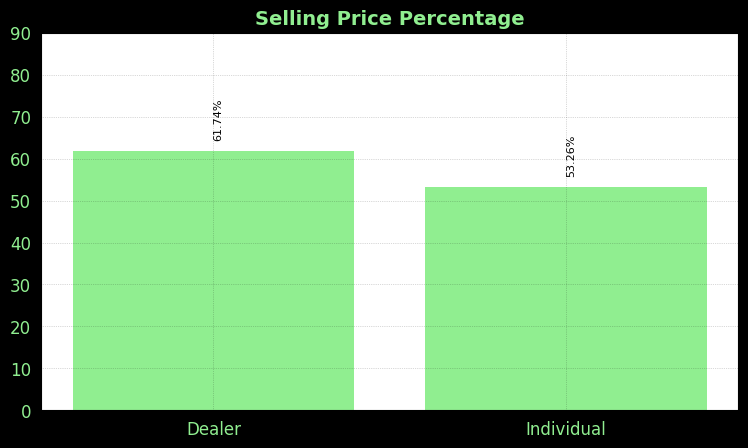

In [24]:
# plot to show selller_type affects selling price 
# eg: if preice of a car is 100 then Dealer will sell it upto 60 - 62 but indivisual/normal men will sell it in less than 58
plt.figure(dpi=100,facecolor='Black' , figsize=(9 ,5))
plt.title('Selling Price Percentage' ,color='lightgreen' ,size=14 , weight='heavy')
bars = plt.bar(df1.index , df1.Percentage_Price_Drop ,color='lightgreen')
for bar in bars:
     plt.text(bar.get_x()+bar.get_width()/2 , bar.get_height()+3 , s=f'{bar.get_height():.2f}%' ,fontdict={'size':8}  ,rotation=90)
plt.xticks(color='lightgreen'  , size=12)
plt.yticks(np.arange(0,91,10), color='lightgreen',size=12)
plt.grid(ls=':' , lw='.5' , color='k' ,alpha=.3)
plt.show()

In [25]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Lets See How Owner-Ship Affects Selling Price  

In [26]:
df1 = df.groupby('Owner').agg({'Owner':'count','Selling_Price':'mean'})
df1['Percentage'] = df1.Selling_Price / df1.Owner
df1

,Owner,Selling_Price,Percentage
Owner,,,
0,290,4.761552,0.016419
1,10,1.970000,0.197000
3,1,2.500000,2.500000


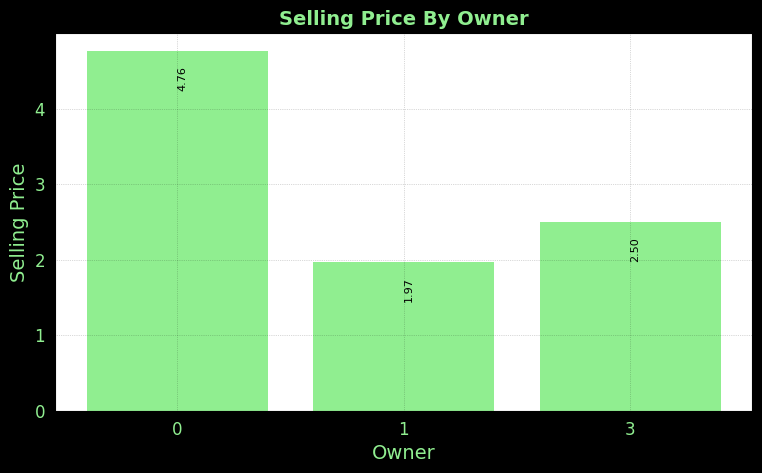

In [27]:
# plot to show how owner ship affects selling price 
plt.figure(dpi=100,facecolor='Black' , figsize=(9 ,5))
plt.title('Selling Price By Owner' ,color='lightgreen' ,size=14 , weight='heavy')
bars = plt.bar(list(map(str ,df1.index)) , df1.Selling_Price ,color='lightgreen')
for bar in bars:
     plt.text(bar.get_x()+bar.get_width()/2 , bar.get_height()-.5 , s=f'{bar.get_height():.2f}' ,fontdict={'size':8}  ,rotation=90)
plt.xticks(np.arange(0 ,3),list(map(str ,df1.index)) ,color='lightgreen'  , size=12)
plt.yticks(color='lightgreen',size=12)
plt.ylabel('Selling Price',color='lightgreen',size=14)
plt.xlabel('Owner',color='lightgreen',size=14)
plt.grid(ls=':' , lw='.5' , color='k' ,alpha=.3)
plt.show()

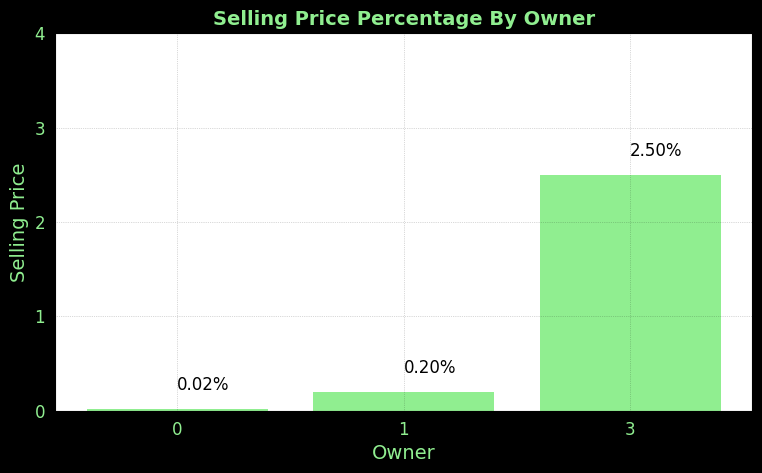

In [28]:
# plot to show how owner ship affects selling price 
plt.figure(dpi=100,facecolor='Black' , figsize=(9 ,5))
plt.title('Selling Price Percentage By Owner' ,color='lightgreen' ,size=14 , weight='heavy')
bars = plt.bar(list(map(str ,df1.index)) , df1.Percentage ,color='lightgreen')
for bar in bars:
     plt.text(bar.get_x()+bar.get_width()/2 , bar.get_height()+.2 , s=f'{bar.get_height():.2f}%' ,fontdict={'size':12})
plt.xticks(np.arange(0 ,3),list(map(str ,df1.index)) ,color='lightgreen'  , size=12)
plt.yticks(np.arange(0 ,5),color='lightgreen',size=12)
plt.ylabel('Selling Price',color='lightgreen',size=14)
plt.xlabel('Owner',color='lightgreen',size=14)
plt.grid(ls=':' , lw='.5' , color='k' ,alpha=.3)
plt.show()